# Exam 2
## ATSC 270 - Computer Concepts in Meteorology

This notebook downloads sounding data from the Iowa Environmental Mesonet (IEM) archive and plots the sounding on a Skew-T Log-P diagram.

The notebook does not work correctly.  Your exam is to go through the following code and fix any bugs.  Note, this code may include <i><b>logical errors</b></i> - or errors in the logic of the code.  The code may run, but provide incorrect output.  This includes incorrect unit conversions.

In [38]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import metpy.calc as mpcalc
from metpy.plots import SkewT, Hodograph
from metpy.units import units

from datetime import datetime

In [39]:
# date, time and station of sounding to be plotted
year = 2011
month = 4
day = 27
hour = 18

station = "KJAN"

### Get Sounding Data from the Iowa Environmental Mesonet (IEM) RAOB Archive
<u>There will be no errors in this section</u>

In [40]:
#get data from Iowa Environmental Mesonet (IEM) RAOB archive

#convert date and time to datetime object
dt = datetime(year=year,month=month,day=day,hour=hour)

#convert datetime object to string to add into the IEM url
t = dt.strftime('%Y%m%d%H%M')

#define the url
url = f"https://mesonet.agron.iastate.edu/json/raob.py?ts={t}&station={station}"

#read the json sounding data using pandas
json = pd.read_json(url)

#convert the json sounding to a pandas dataframe
df = pd.json_normalize(json.profiles[0],'profile',['station','valid'])

#convert the "valid" variable to a datetime object
df['valid'] = pd.to_datetime(df['valid'])

### Get Dataframe Ready for Plotting

In [42]:
### create a new dataframe for just temperature and dewpoint ###

#first remove any rows where there is no data
df_temp = df.dropna(subset=['tmpc','dwpc'])
#next just keep pressure, height, temperature, and dewpoint
df_temp = df_temp[['pres','hght','tmpc','dwpc']]

### create a new dataframe for just winds ###

#first remove any rows where there is no data
df_wind = df.dropna(subset=['sknt','drct'])
#next just keep pressure, height, temperature, and dewpoint
df_wind = df_wind[['pres','hght', 'sknt', 'drct']] 

### Create Numpy Arrays for Temperature Plotting and Add Units

In [24]:
pressure = np.array(df_temp['pres']) * units('hectopascals')
height = np.array(df_temp['hght']) * units('meters')
temperature = np.array(df_temp['tmpc']) * units('degF')
dewpoint = np.array(df_temp['dwpc']) * units('degF')


### Create Numpy Arrays for Wind Plotting and Add Units

In [47]:
wind_pressure = np.array(df_wind['pres']) * units('hectopascals')
wind_height = np.array(df_wind['hght']) * units('meters')
wind_speed = np.array(df_wind['sknt']) * units('knots')
wind_direction = np.array(df_wind['drct']) * units('degree')

### Convert Wind Speed & Direction to U & V

In [48]:
u,v = mpcalc.wind_components(wind_speed, wind_direction)



### Make Figure 

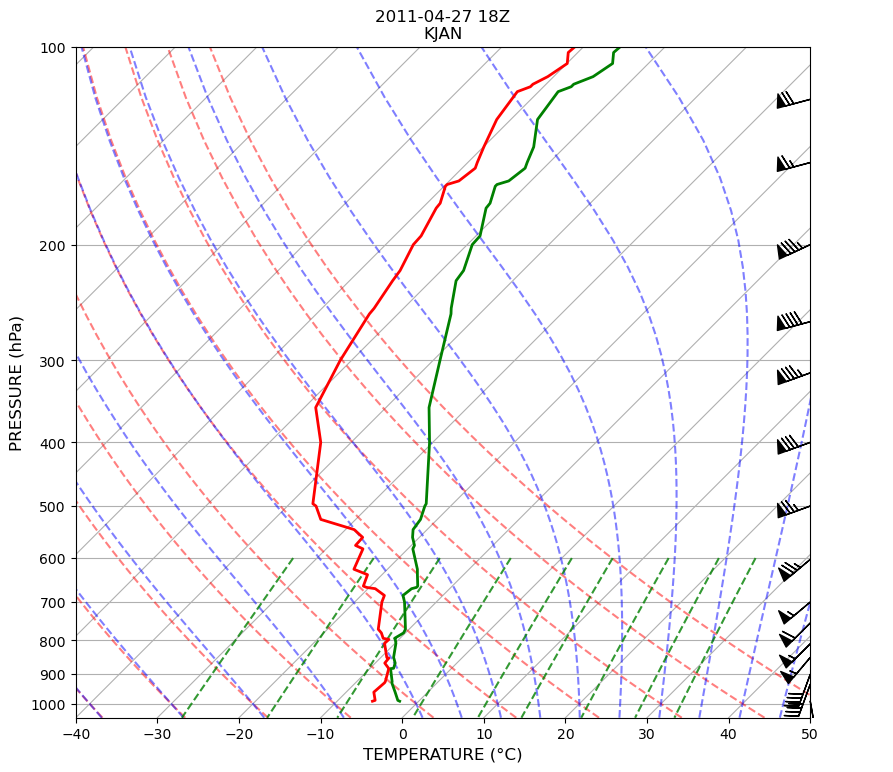

In [54]:
#create skew-t figure
fig = plt.figure(figsize=(9, 9), dpi=100,facecolor='w')
skew = SkewT(fig, rotation=45)

#plot temperature in red and dewpoint in green
skew.plot(pressure, temperature, 'g',lw=2)
skew.plot(pressure, dewpoint, 'r',lw=2)

#create axes labels
plt.xlabel('TEMPERATURE (\N{degree sign}C)',fontsize=12)
plt.ylabel('PRESSURE (hPa)',fontsize=12)

#add in typical lines
skew.plot_dry_adiabats(color='orangered')
skew.plot_moist_adiabats(color='tab:green')
skew.plot_mixing_lines(color='tab:blue')

#plot winds
#only plot every other wind barb so it's not too busy
#(y_clip_radius keeps barbs from plotting outside of skew-t)
skew.plot_barbs(wind_pressure[::2],u[::2],v[::2],y_clip_radius=0)

#add title for date and location
plt.title(f'{dt.strftime("%Y-%m-%d %HZ")}\nKJAN')


#save figure
fig.tight_layout()
plt.savefig('SkewT.png')